<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gravity-wave-top-boundary-condition" data-toc-modified-id="Gravity-wave-top-boundary-condition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gravity wave top boundary condition</a></span></li><li><span><a href="#Smith-boundaries" data-toc-modified-id="Smith-boundaries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Smith boundaries</a></span></li></ul></div>

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
H = 1.98 * np.pi / 6 + 2 * np.pi
h = np.linspace(0,0.985,100)
delta_low = np.linspace(0,0,100)
delta_high = np.linspace(0,0,100)

def state_function(delta):
    return h - delta * np.cos(H + delta - h)

last_guess = -4
for i in range(len(h)):
    delta_low[i] = fsolve((lambda d: h[i] - d * np.cos(H + d - h[i])), last_guess)
    last_guess = delta_low[i]
    
last_guess = 0
for i in range(len(h)):
    delta_high[i] = fsolve((lambda d: h[i] - d * np.cos(H + d - h[i])), last_guess)
    last_guess = delta_high[i]
    

/Users/pacopoler/.local/share/virtualenvs/thesis_code-NOyFC3kn/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/pacopoler/.local/share/virtualenvs/thesis_code-NOyFC3kn/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


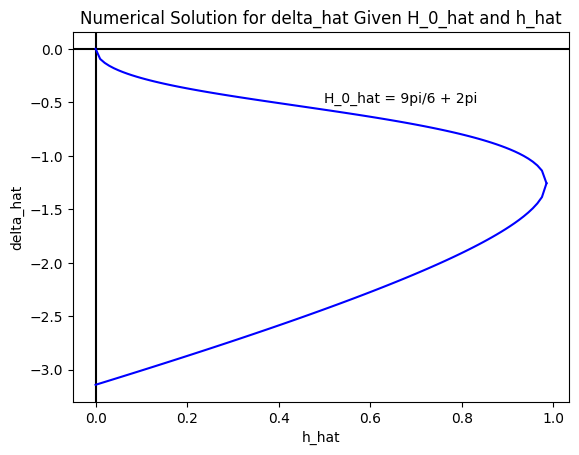

In [105]:
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.plot(h, delta_low, color='b')
plt.plot(h, delta_high, color='b')
plt.ylabel('delta_hat')
plt.xlabel('h_hat')
plt.text(0.5,-0.5, 'H_0_hat = 9pi/6 + 2pi')
plt.title('Numerical Solution for delta_hat Given H_0_hat and h_hat')
plt.savefig('Smith_imitation.pdf')

In [3]:
#smith parameters
H_0 = 0
N_0 = 0
U_0 = 0
l = N_0 / U_0
h = 0
h_hat = h*l
H_0_hat = H_0*l
delta_hat = solve(h_hat, H_0_hat)

ZeroDivisionError: division by zero

# Gravity wave top boundary condition

In [4]:
def h(x):
    # units of km
    return 1 * np.exp(-(x - 50)**2 / 10)

def C(x):
    c = 1 #km
    k = (2 * np.pi) / 20 #km^-1
    phi = 0
    
    return c * np.sin(k*x + phi) * (x >= 50)

def A(h, H, l, C, x):
    return (C(x) * np.cos(l*h(x)) - h(x) * np.cos(l*H)) / (np.sin(l*H) - np.sin(l*h(x))*np.cos(l*H))

def B(h,H,l,C,x):
#     numerator = h(x)*(np.sin(l*H)-(1+np.sin(l*h(x)))*np.cos(l*H))-C*np.sin(k*x+phi)*np.cos(l*h(x))
#     return numerator/(np.sin(l*H)*np.cos(l*h(x)) - np.cos(l*H)*np.sin(l*h(x))*np.cos(l*h(x)))
    return (h(x) - A(h,H,l,C,x) * np.sin(l*h(x))) / np.cos(l*h(x))

def delta(h,H,l,C,x,z):
    return A(h,H,l,C,x) * np.sin(l * z) + B(h,H,l,C,x) * np.cos(l * z)


Text(0, 0.5, 'Z (km)')

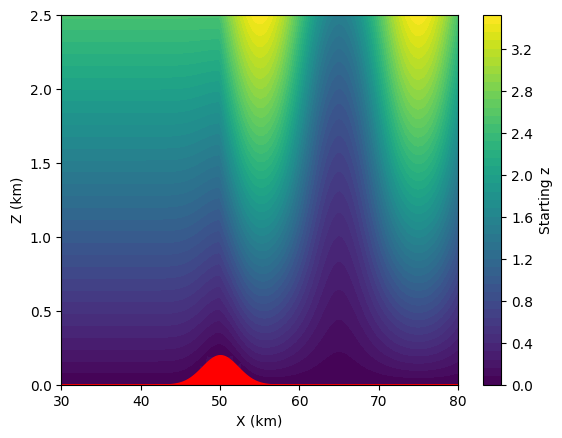

In [5]:
H = 2.5 #km

def h(x):
    # units of km
    return 0.2 * np.exp(-(x - 50)**2 / 10)

l = 0.6473790757612268 # km^-1

X = np.linspace(30,80, num=300)
Z = np.linspace(0,2.5, num=50)

Deltas = np.zeros([300, 50])
for xidx in range(300):
    for zidx in range(50):
        x = X[xidx]
        z = Z[zidx]
        if z >= h(x):
            Deltas[xidx,zidx] = delta(h, H, l, C, x, z)
        
# plt.contourf(X, Z, Deltas.transpose(), levels=50)
plt.contourf(X, Z, Z[:,None] - Deltas.transpose(), levels=50)
plt.fill_between(X,h(X),color='r')
plt.colorbar(label='Starting z')
plt.xlabel('X (km)')
plt.ylabel('Z (km)')

# plt.tight_layout(h_pad=1.25)
# plt.savefig('H2.5streamlines.pdf')

# Smith boundaries

deflection discontinuity at 47.05685618729097: 0.1182577417715171
still deflection discontinuity at 47.05685618729097: 0.11799540071606601


(-3.0, 3.0)

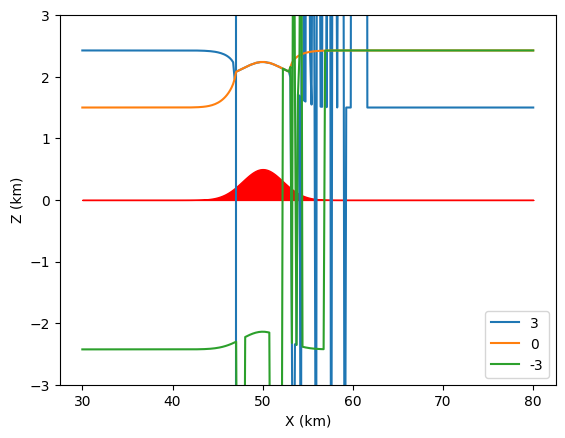

In [6]:
# matching above

def h(x):
    # units of km
    return 0.5 * np.exp(-(x - 50)**2 / 10)

def div_stream(h, last_div, H, l, x):
    return fsolve(lambda d: h(x) - d * np.cos(l * (H + d - h(x))), last_div)[0]

X = np.linspace(30,80, num=300)
H = 1.5

dividing_stream_solution = {
    3: [],
    0: [],
    -3: []
}

last_div = 0

for x in X:
    new_deflection = {}
    new_deflection[0] = div_stream(h, last_div, H, l, x)

    if abs(new_deflection[0] - last_div) > 0.1:
        print(f'deflection discontinuity at {x}: {new_deflection[0] - last_div}')
        new_deflection_high = div_stream(h, last_div + 0.1, H, l, x)
        new_deflection_low = div_stream(h, last_div - 0.1, H, l, x)
        high_discont = new_deflection_high - last_div
        low_discont = new_deflection_low - last_div
        if abs(new_deflection_low) <= abs(new_deflection_high):
            new_deflection[0] = new_deflection_low
        else:
            new_deflection[0] = new_deflection_high

        if abs(new_deflection[0] - last_div) > 0.1:
            print(f'still deflection discontinuity at {x}: {new_deflection[0] - last_div}')
            plt.axvline(x)
    
    for sol in [-3, 3]:
        new_deflection[sol] = div_stream(h, last_div + sol, H, l, x)

    for sol in new_deflection:
        dividing_stream_solution[sol].append(new_deflection[sol] + H)
    last_div = new_deflection[0]

# single solution version
# dividing_stream = []
# last_div = 0
# for x in X:
#     new_deflection = div_stream(h, last_div, H, l, x)
#     if abs(new_deflection - last_div) > 0.1:
#         print(f'deflection discontinuity at {x}: {new_deflection - last_div}')
#         new_deflection_high = div_stream(h, last_div + 0.1, H, l, x)
#         new_deflection_low = div_stream(h, last_div - 0.1, H, l, x)
#         high_discont = new_deflection_high - last_div
#         low_discont = new_deflection_low - last_div
#         if abs(new_deflection_low) <= abs(new_deflection_high):
#             new_deflection = new_deflection_low
#         else:
#             new_deflection = new_deflection_high
            
#         if abs(new_deflection - last_div) > 0.1:
#             print(f'still deflection discontinuity at {x}: {new_deflection - last_div}')
#             plt.axvline(x)
        
#     dividing_stream.append(new_deflection + H)
#     last_div = dividing_stream[-1] - H

# discontinuity = dividing_stream[120] - dividing_stream[121]
# for i in range(121, len(dividing_stream)):
#     dividing_stream[i] += discontinuity

# plt.contourf(X, Z, Z[:,None] - Deltas.transpose(), levels=50)
plt.fill_between(X,h(X),color='r')
# plt.colorbar(label='streamline z-deflection')
for sol in dividing_stream_solution:
    plt.plot(X, dividing_stream_solution[sol], label=sol)
plt.legend()
plt.xlabel('X (km)')
plt.ylabel('Z (km)')
plt.ylim([-3,3])
# plt.tight_layout(h_pad=1.25)
# plt.savefig('H2.5.pdf')

deflection discontinuity at 51.40713571190397: [48.03961018]
deflection discontinuity at 52.457485828609535: [-5.59117276]


Text(0, 0.5, 'Z (km)')

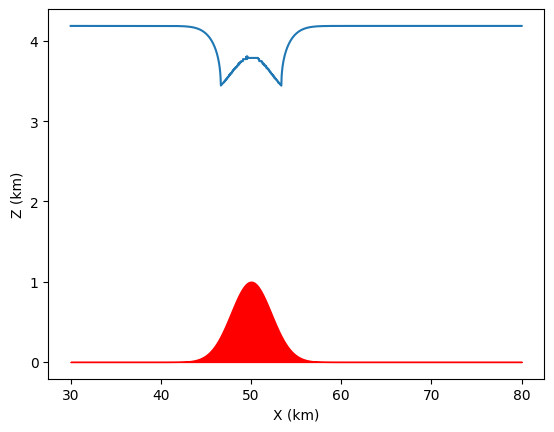

In [7]:
# simulation conditions

def h(x):
    # units of km
    return 1 * np.exp(-(x - 50)**2 / 10)

def div_stream(h, last_div, H, l, x):
    return fsolve(lambda d: h(x) - d * np.cos(l * (H + d - h(x))), last_div)

X = np.linspace(30,80, num=3000)


dividing_stream = []
H = 8*np.pi / 6
last_div = 0
for x in X:
    new_deflection = div_stream(h, last_div, H, l, x)
    if abs(new_deflection - last_div) > 0.1:
        print(f'deflection discontinuity at {x}: {new_deflection - last_div}')
        new_deflection_high = div_stream(h, last_div + 0.1, H, l, x)
        new_deflection_low = div_stream(h, last_div - 0.1, H, l, x)
        high_discont = new_deflection_high - last_div
        low_discont = new_deflection_low - last_div
        if abs(new_deflection_low) <= abs(new_deflection_high):
            new_deflection = new_deflection_low
        else:
            new_deflection = new_deflection_high
            
        if abs(new_deflection - last_div) > 0.1:
            print(f'still deflection discontinuity at {x}: {new_deflection - last_div}')
            plt.axvline(x)
        
    dividing_stream.append(new_deflection + H)
    last_div = dividing_stream[-1] - H

# discontinuity = dividing_stream[120] - dividing_stream[121]
# for i in range(121, len(dividing_stream)):
#     dividing_stream[i] += discontinuity

# plt.contourf(X, Z, Z[:,None] - Deltas.transpose(), levels=50)
plt.fill_between(X,h(X),color='r')
# plt.colorbar(label='streamline z-deflection')
plt.plot(X, dividing_stream)
plt.xlabel('X (km)')
plt.ylabel('Z (km)')

# plt.tight_layout(h_pad=1.25)
# plt.savefig('H2.5.pdf')

Text(0.5, 0, 'h height')

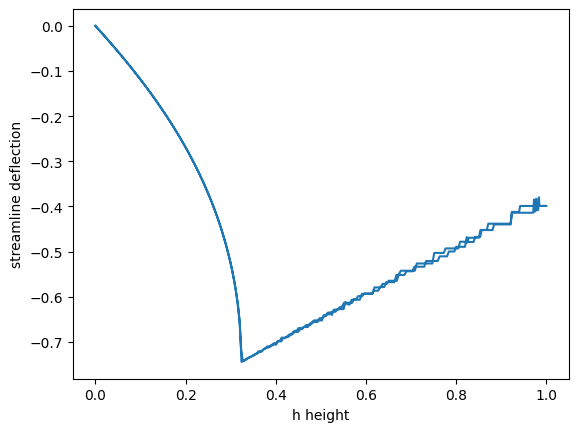

In [8]:
plt.plot(h(X), [i - H for i in dividing_stream])
plt.ylabel('streamline deflection')
plt.xlabel('h height')